In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

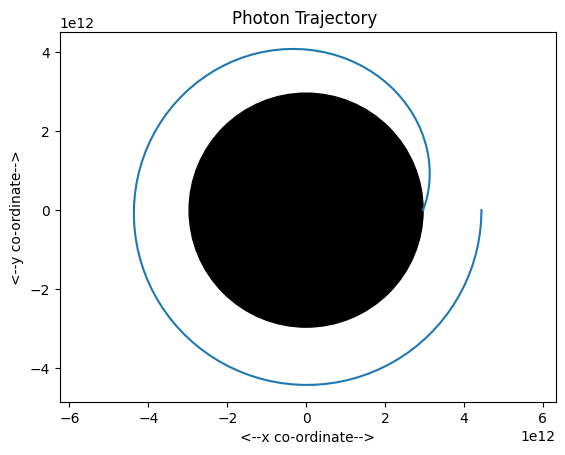

In [10]:
'''
Solving the differential equation and plotting it first

'''

G=6.674e-11
c=3e8
Msun = 2e30
M = 10e8*Msun
global r_bh 
r_bh = 2*G*M/(c**2)



def def_eq(r,th):
    dr_dth = math.sqrt((4/(27*r_bh**2))*r**4 - r**2 + r_bh * r)
    return dr_dth

r0=r_bh
th=np.linspace(0,2*math.pi,100)
fig,ax=plt.subplots()
ax.add_patch(plt.Circle((0,0),r_bh,color='black'))
r=odeint(def_eq,r0,th)
r=r.flatten()
ax.plot(r*np.cos(th),r*np.sin(th))
plt.xlabel("<--x co-ordinate-->")
plt.ylabel("<--y co-ordinate-->")
plt.title("Photon Trajectory ")
plt.axis("equal")
plt.show()

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

G=6.674e-11
c=3e8
M=1e38
global r_bh 
r_bh = G*M/(c**2)

global p1
p1=np.array([4.5,4,3.5,3.0,2.8,2.675,2.6,2.59])
global l
l=np.array([p1[0]*r_bh*c,p1[1]*r_bh*c,p1[2]*r_bh*c,p1[3]*c*r_bh,p1[4]*r_bh*c,p1[5]*r_bh*c,p1[6]*r_bh*c,p1[7]*r_bh*c])

class Photon:
    v=[0.0,0.0]
    pos=[0.0,0.0]
    def __init__(self,pos,v):
        self.pos=pos
        self.v=v
    def r(self):
        return math.sqrt(self.pos[0]**2+self.pos[1]**2)
    def update(self,dt,j):
        a=np.zeros(2,dtype='float64')
    
        a[0] =   ((-1)*(1.5*(r_bh)*l[j]**2)*(self.pos[0])) /(self.r()**5)
        a[1] =  ((-1)*(1.5*(r_bh)*l[j]**2)*(self.pos[1])) /(self.r()**5)
        self.v += a*dt
        self.pos += self.v*dt
        
class Traj:
    p=[]
    def __init__(self,n,pos,v):
        self.n = n
        for i  in range(n):
            self.p.append(Photon(pos[i],v[i]))
        
    def photon_simulation(self,dt,n_steps):
        arr=np.zeros(((2*self.n),n_steps),dtype='float64')
        
        for i in range(self.n):
            ph=self.p[i]
            for j in range(n_steps):
                if ph.r()>r_bh:
                    self.p[i].update(dt,i)
                arr[2*i][j] = self.p[i].pos[0]
                arr[2*i+1][j] = self.p[i].pos[1]

        circle = plt.Circle((0, 0),r_bh,color='black')  
        fig, ax = plt.subplots()
        ax.add_patch(circle) 
        max = np.max(p1) + 1
        ax.set_xlim([-1.5*max*r_bh, 1.5*max*r_bh])
        ax.set_ylim([-1.5*max*r_bh, 1.5*max*r_bh])
        ax.add_patch(plt.Circle((0,0),1.5*r_bh,linestyle='dotted',color="blue",fill=False))
        for i in range(self.n):
            ax.plot(arr[2*i][:],arr[2*i+1][:],label=p1[i])
        ax.set_aspect("equal")
        plt.xlabel("<--x co-ordinate-->")
        plt.ylabel("<--y co-ordinate-->")
        plt.title("Photon Trajectory ")
        plt.grid(True)
        plt.legend()
        plt.show()


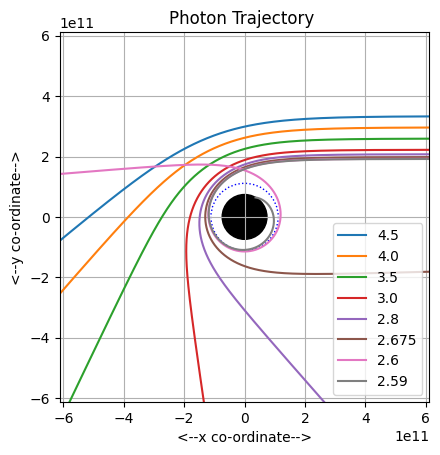

In [15]:
G=6.674e-11
c=3e8
M = 1e38 
r_bh = G*M/(c**2)
# print(r_bh)

p1=np.array([4.5,4,3.5,3.0,2.8,2.675,2.6,2.59])
pos=np.array([np.array([20*r_bh,p1[0]*r_bh]),np.array([20*r_bh,p1[1]*r_bh]),np.array([20*r_bh,p1[2]*r_bh]),np.array([20*r_bh,p1[3]*r_bh]),np.array([20*r_bh,p1[4]*r_bh])
            ,np.array([20*r_bh,p1[5]*r_bh]),np.array([20*r_bh,p1[6]*r_bh]),np.array([20*r_bh,p1[7]*r_bh])])
vel=np.array([np.array([-c,0]),np.array([-c,0]),np.array([-c,0]),np.array([-c,0]),np.array([-c,0])
            ,np.array([-c,0]),np.array([-c,0]),np.array([-c,0])])
photon= Traj(8,pos,vel)
photon.photon_simulation(1,100000)
